In [ ]:
pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 18.2 MB/s eta 0:00:00


In [ ]:
from gymnasium import Env, spaces, register, make
import numpy as np
from time import sleep
import pygame
import random
import matplotlib.pyplot as plt

1-MULTI ARMED BANDITS

In [ ]:
#env1
class BanditWalkEnv1(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None,a_b=(0.5,0.5)):
        a,b=a_b
        self.P = {
            1: {
                0: [(1.0, 1, 0.0, True)],
                1: [(1.0, 1, 0.0, True)]
            },
            0: {
                0: [(a, 1, 1.0, True), (1-a, 2, 0.0, True)],
                1: [(b, 2, 1.0, True), (1-b, 1, 0.0, True)]
            },
            2: {
                0: [(1.0, 2, 0.0, True)],
                1: [(1.0, 2, 0.0, True)]
            }
        }
        self.size = 3 # The size of the 1D grid

       #We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        #We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(2)

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None

    def _get_obs(self):

        return self._agent_location


    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._agent_location = 0
        self._target_location = self.size-1
        self._dead_state = 1


        observation = self._get_obs()

        if self.render_mode == "human":
            self._render_frame()

        return observation


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]

        observation = self._get_obs()
        truncated = False

        # "current_state": prev_location,"action":action,"next_state": self._agent_location,"reward":reward,"done":terminated
        tansition_info={"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location,
                        "reward":reward,
                        "done":terminated}

        if self.render_mode == "human":
            self._render_frame()

        # Return the required 5-tuple
        return observation, reward, terminated,truncated,tansition_info

register(id='BanditWalk-1', entry_point=BanditWalkEnv1)

#env2
class MultiBanditWalkEnv1(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None):
        self.P = {
            0: {
                0: [(1.0, 1, True)],
                1: [(1.0, 2, True)],
                2: [(1.0, 3, True)],
                3: [(1.0, 4, True)],
                4: [(1.0, 5, True)],
                5: [(1.0, 6, True)],
                6: [(1.0, 7, True)],
                7: [(1.0, 8, True)],
                8: [(1.0, 9, True)],
                9: [(1.0, 10, True)]
            },
            1: {
                0: [(1.0, 1, True)],
                1: [(1.0, 1, True)],
                2: [(1.0, 1, True)],
                3: [(1.0, 1, True)],
                4: [(1.0, 1, True)],
                5: [(1.0, 1, True)],
                6: [(1.0, 1, True)],
                7: [(1.0, 1, True)],
                8: [(1.0, 1, True)],
                9: [(1.0, 1, True)]
            },
            2: {
                0: [(1.0, 2, True)],
                1: [(1.0, 2, True)],
                2: [(1.0, 2, True)],
                3: [(1.0, 2, True)],
                4: [(1.0, 2, True)],
                5: [(1.0, 2, True)],
                6: [(1.0, 2, True)],
                7: [(1.0, 2, True)],
                8: [(1.0, 2, True)],
                9: [(1.0, 2, True)]
            },
            3: {
                0: [(1.0, 3, True)],
                1: [(1.0, 3, True)],
                2: [(1.0, 3, True)],
                3: [(1.0, 3, True)],
                4: [(1.0, 3, True)],
                5: [(1.0, 3, True)],
                6: [(1.0, 3, True)],
                7: [(1.0, 3, True)],
                8: [(1.0, 3, True)],
                9: [(1.0, 3, True)]
            },
            4: {
                0: [(1.0, 4, True)],
                1: [(1.0, 4, True)],
                2: [(1.0, 4, True)],
                3: [(1.0, 4, True)],
                4: [(1.0, 4, True)],
                5: [(1.0, 4, True)],
                6: [(1.0, 4, True)],
                7: [(1.0, 4, True)],
                8: [(1.0, 4, True)],
                9: [(1.0, 4, True)]
            },
            5: {
                0: [(1.0, 5, True)],
                1: [(1.0, 5, True)],
                2: [(1.0, 5, True)],
                3: [(1.0, 5, True)],
                4: [(1.0, 5, True)],
                5: [(1.0, 5, True)],
                6: [(1.0, 5, True)],
                7: [(1.0, 5, True)],
                8: [(1.0, 5, True)],
                9: [(1.0, 5, True)]
            },
            6: {
                0: [(1.0, 6, True)],
                1: [(1.0, 6, True)],
                2: [(1.0, 6, True)],
                3: [(1.0, 6, True)],
                4: [(1.0, 6, True)],
                5: [(1.0, 6, True)],
                6: [(1.0, 6, True)],
                7: [(1.0, 6, True)],
                8: [(1.0, 6, True)],
                9: [(1.0, 6, True)]
            },
            7: {
                0: [(1.0, 7, True)],
                1: [(1.0, 7, True)],
                2: [(1.0, 7, True)],
                3: [(1.0, 7, True)],
                4: [(1.0, 7, True)],
                5: [(1.0, 7, True)],
                6: [(1.0, 7, True)],
                7: [(1.0, 7, True)],
                8: [(1.0, 7, True)],
                9: [(1.0, 7, True)]
            },
            8: {
                0: [(1.0, 8, True)],
                1: [(1.0, 8, True)],
                2: [(1.0, 8, True)],
                3: [(1.0, 8, True)],
                4: [(1.0, 8, True)],
                5: [(1.0, 8, True)],
                6: [(1.0, 8, True)],
                7: [(1.0, 8, True)],
                8: [(1.0, 8, True)],
                9: [(1.0, 8, True)]
            },
            9: {
                0: [(1.0, 9, True)],
                1: [(1.0, 9, True)],
                2: [(1.0, 9, True)],
                3: [(1.0, 9, True)],
                4: [(1.0, 9, True)],
                5: [(1.0, 9, True)],
                6: [(1.0, 9, True)],
                7: [(1.0, 9, True)],
                8: [(1.0, 9, True)],
                9: [(1.0, 9, True)]
            },

            10: {
                0: [(1.0, 10, True)],
                1: [(1.0, 10, True)],
                2: [(1.0, 10, True)],
                3: [(1.0, 10, True)],
                4: [(1.0, 10, True)],
                5: [(1.0, 10, True)],
                6: [(1.0, 10, True)],
                7: [(1.0, 10, True)],
                8: [(1.0, 10, True)],
                9: [(1.0, 10, True)]
            }
        }
        self.size = 11 # The size of the 1D grid

        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(10)

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None


    def _get_obs(self):

        return self._agent_location


    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self._agent_location = 0

        observation = self._get_obs()

        if self.render_mode == "human":
            self._render_frame()

        return observation


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_state, terminated = zip(*transitions)

        mu=0
        sigma=2
        action_value=1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(action- mu)**2 / (2 * sigma**2))
        reward=np.random.normal(action_value, sigma)

        self._agent_location=next_state[0]

        observation = self._get_obs()
        truncated = False

        # "current_state": prev_location,"action":action,"next_state": self._agent_location,"reward":reward,"done":terminated
        tansition_info={"current_state": prev_location,
                       "action":action,
                        "next_state": self._agent_location,
                        "reward":reward,
                        "done":terminated[0]}

        if self.render_mode == "human":
            self._render_frame()

        # Return the required 5-tuple
        return observation, reward, terminated[0],truncated,tansition_info

register(id='BanditWalk-2', entry_point=MultiBanditWalkEnv1)



In [ ]:
#function for decay epsilon
def decayAlpha(initialValue, finalValue, maxSteps, decayType):
    alpha=initialValue
    alpha_l=[]
    if finalValue == 0:
        print("Error: Final value is zero.")
        return None
    if decayType=="linear":
        s_val=(initialValue-finalValue)/(maxSteps-1)
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha-s_val
    if decayType=="exponential":
        s_val=(np.log(initialValue/finalValue))/maxSteps
        for i in range(maxSteps):
            alpha_l.append(alpha)
            alpha=alpha*(np.exp(-s_val))
        alpha_l[maxSteps-1]=finalValue
    return alpha_l

#function to calculate regret
def Regret(q_est,action):
  regret=0
  for i in range(len(q_est)):
    q=q_est[i]
    a=int(action[i])
    v_opt=np.max(q)
    q_taken=q[a]
    rg=v_opt-q_taken
    regret=regret+rg
  return regret




In [ ]:
#BANDITS AGENTS

#pure expoitation
def pure_exploitation(env,seed,maxepisodes):
    Q=np.zeros(env.action_space.n)
    N=np.zeros(env.action_space.n)
    e=0
    Q_est=np.zeros((maxepisodes,env.action_space.n))
    rewards=np.zeros(maxepisodes)
    actions=np.zeros(maxepisodes)

    while e<maxepisodes:
      observation= env.reset(seed=seed)
      a=np.argmax(Q)
      actions[e]=a
      observation, R, terminated, truncated, info=env.step(a)
      rewards[e]=R
      N[a]=N[a]+1
      Q[a]=Q[a]+(R-Q[a])/N[a]
      Q_est[e]=Q
      e=e+1
    return actions ,rewards, Q_est

#pure exploration
def pure_exploration(env,seed,maxepisodes):
    Q=np.zeros(env.action_space.n)
    N=np.zeros(env.action_space.n)
    e=0
    Q_est=np.zeros((maxepisodes,env.action_space.n))
    rewards=np.zeros(maxepisodes)
    actions=np.zeros(maxepisodes)
    while e<maxepisodes:
      observation= env.reset(seed=seed)
      a=np.random.randint(len(Q))
      actions[e]=a
      observation, R, terminated, truncated, info=env.step(a)
      rewards[e]=R
      N[a]=N[a]+1
      Q[a]=Q[a]+(R-Q[a])/N[a]
      Q_est[e]=Q
      e=e+1
    return actions ,rewards,Q_est

#epsilon greedy
def epsilon_greedy(env,seed,maxepisodes,E):
    Q=np.zeros(env.action_space.n)
    N=np.zeros(env.action_space.n)
    e=0
    Q_est=np.zeros((maxepisodes,env.action_space.n))
    rewards=np.zeros(maxepisodes)
    actions=np.zeros(maxepisodes)
    while e<maxepisodes:
      observation= env.reset(seed=seed)
      if np.random.random()>E:
        a=np.argmax(Q)
      else:
        a=np.random.randint(len(Q))
      actions[e]=a
      observation, R, terminated, truncated, info=env.step(a)
      rewards[e]=R
      N[a]=N[a]+1
      Q[a]=Q[a]+(R-Q[a])/N[a]
      Q_est[e]=Q
      e=e+1
    return actions ,rewards ,Q_est

#decaying epsilon greedy
def decay_epsilon_greedy(env,seed,maxepisodes,Epsilon):
    Q=np.zeros(env.action_space.n)
    N=np.zeros(env.action_space.n)
    e=0
    Q_est=np.zeros((maxepisodes,env.action_space.n))
    rewards=np.zeros(maxepisodes)
    actions=np.zeros(maxepisodes)
    while e<maxepisodes:
      E=Epsilon[e]
      observation= env.reset(seed=seed)
      if np.random.random()>E:
        a=np.argmax(Q)
      else:
        a=np.random.randint(len(Q))
      actions[e]=a
      observation, R, terminated, truncated, info=env.step(a)
      rewards[e]=R
      N[a]=N[a]+1
      Q[a]=Q[a]+(R-Q[a])/N[a]
      Q_est[e]=Q
      e=e+1
    return actions ,rewards ,Q_est

#softmax strategy
def softmax(env,seed,maxepisodes,T):
  Q=np.zeros(env.action_space.n)
  N=np.zeros(env.action_space.n)
  e=0
  Q_est=np.zeros((maxepisodes,env.action_space.n))
  rewards=np.zeros(maxepisodes)
  actions=np.zeros(maxepisodes)
  while e<maxepisodes:
    t=T[e]
    observation= env.reset(seed=seed)
    probs=(np.exp(Q/t))/(np.sum(np.exp(Q/t)))
    a=np.random.choice(env.action_space.n,1,p=probs)[0]
    actions[e]=a
    observation, R, terminated, truncated, info=env.step(a)
    rewards[e]=R
    N[a]=N[a]+1
    Q[a]=Q[a]+(R-Q[a])/N[a]
    Q_est[e]=Q
    e=e+1
  return actions, rewards, Q_est

#UCB
def UCB(env,seed,maxepisodes,c):
  Q=np.zeros(env.action_space.n)
  N=np.zeros(env.action_space.n)
  e=0
  Q_est=np.zeros((maxepisodes,env.action_space.n))
  rewards=np.zeros(maxepisodes)
  actions=np.zeros(maxepisodes)
  while e<maxepisodes:
    observation= env.reset(seed=seed)
    if e<len(Q):
      a=e
    else:
      U=c*np.sqrt(np.log(e)/N)
      a=np.argmax(Q+U)
    actions[e]=a
    observation, R, terminated, truncated, info=env.step(a)
    rewards[e]=R
    N[a]=N[a]+1
    Q[a]=Q[a]+(R-Q[a])/N[a]
    Q_est[e]=Q
    e=e+1
  return actions, rewards, Q_est

In [ ]:
#1
a_b = [(0, 0),(1, 0),(0, 1),(1, 1),(0.5, 0.5)]
for ab in a_b:
  env1 = make('BanditWalk-1', render_mode="rgb_array",a_b=ab)
  observation= env1.reset(seed=42)
  print(ab)
  for _ in range(5):
      action = env1.action_space.sample()
      observation, reward, terminated, truncated, info = env1.step(action)

      print(info,"\n\n")

      if terminated or truncated:
          observation= env1.reset(seed=42)


(0, 0)
{'current_state': 0, 'action': 0, 'next_state': 2, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 2, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 1, 'next_state': 1, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 2, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 2, 'reward': 0.0, 'done': True} 


(1, 0)
{'current_state': 0, 'action': 0, 'next_state': 1, 'reward': 1.0, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 1, 'reward': 1.0, 'done': True} 


{'current_state': 0, 'action': 1, 'next_state': 1, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 1, 'reward': 1.0, 'done': True} 


{'current_state': 0, 'action': 1, 'next_state': 1, 'reward': 0.0, 'done': True} 


(0, 1)
{'current_state': 0, 'action': 0, 'next_state': 2, 'reward': 0.0, 'done': True} 


{'current_state': 0, 'action': 1, 'next_state': 2, 'reward': 1.0, 

/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:189: UserWarning: WARN: The result returned by `env.reset()` was not a tuple of the form `(obs, info)`, where `obs` is a observation and `info` is a dictionary containing additional information. Actual type: `<class 'int'>`
  logger.warn(


In [ ]:
#2
env2 = make('BanditWalk-2', render_mode="rgb_array")
observation= env2.reset(seed=42)
for _ in range(5):
    action = env2.action_space.sample()
    observation, reward, terminated, truncated, info = env2.step(action)

    print(info,"\n\n")

    if terminated or truncated:
        observation= env2.reset(seed=42)

{'current_state': 0, 'action': 3, 'next_state': 4, 'reward': 0.6890775291032533, 'done': True} 


{'current_state': 0, 'action': 5, 'next_state': 6, 'reward': -0.8221174702366667, 'done': True} 


{'current_state': 0, 'action': 1, 'next_state': 2, 'reward': 1.2538394397860142, 'done': True} 


{'current_state': 0, 'action': 0, 'next_state': 1, 'reward': 1.0912594282648411, 'done': True} 


{'current_state': 0, 'action': 3, 'next_state': 4, 'reward': -2.0379097948140292, 'done': True} 




In [ ]:
#3a
print("pure_exploitation")
a,r,q_est=pure_exploitation(env1,seed=42,maxepisodes=10)
print(a)
print(r)
print(q_est)

#3b
print("pure_exploration")
a,r,q_est=pure_exploration(env1,seed=42,maxepisodes=10)
print(a)
print(r)
print(q_est)

#3c
print("epilson_greedy")
a,r,q_est=epsilon_greedy(env1,seed=42,maxepisodes=10,E=0.5)
print(a)
print(r)
print(q_est)

#3d
print("decay_epilson_greedy")
epsilon=decayAlpha(1, 0.001, maxSteps=10, decayType="linear")
a,r,q_est=decay_epsilon_greedy(env1,seed=42,maxepisodes=10,Epsilon=epsilon)
print(a)
print(r)
print(q_est)

#3e
print("softmax")
t=decayAlpha(10, 0.01, maxSteps=10, decayType="linear")
a,r,q_est=softmax(env1,seed=42,maxepisodes=10,T=t)
print(a)
print(r)
print(q_est)

#3f
print("UCB")
a,r,q_est=UCB(env1,seed=42,maxepisodes=10,c=0.2)
print(a)
print(r)
print(q_est)

pure_exploitation
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[[0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]
 [0.11111111 0.        ]
 [0.1        0.        ]]
pure_exploration
[0. 1. 1. 0. 1. 0. 1. 0. 0. 1.]
[0. 1. 0. 0. 0. 0. 0. 1. 1. 1.]
[[0.         0.        ]
 [0.         1.        ]
 [0.         0.5       ]
 [0.         0.5       ]
 [0.         0.33333333]
 [0.         0.33333333]
 [0.         0.25      ]
 [0.25       0.25      ]
 [0.4        0.25      ]
 [0.4        0.4       ]]
epilson_greedy
[0. 1. 0. 1. 0. 0. 0. 0. 0. 0.]
[1. 0. 1. 1. 1. 0. 0. 0. 0. 1.]
[[1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.5       ]
 [1.         0.5       ]
 [0.75       0.5       ]
 [0.6        0.5       ]
 [0.5        0.5       ]
 [0.42857143 0.5       ]
 [0.5        0.5       ]]
decay

In [ ]:
#4
#50 instances of 2-armed-bandit
env=[]
num_samples=50
a = np.random.uniform(0, 1, size=num_samples)
b = np.random.uniform(0, 1, size=num_samples)
a_b = [(a[i], b[i]) for i in range(num_samples)]
for i in range(50):
  environment = make('BanditWalk-1', render_mode="rgb_array",a_b=a_b[i])
  env.append(environment)

#2_armed-agents
reward_1=np.zeros(1000)
reward_2=np.zeros(1000)
reward_3=np.zeros(1000)
reward_4=np.zeros(1000)
reward_5=np.zeros(1000)
reward_6=np.zeros(1000)
for i in range(50):
  _,reward,_=pure_exploitation(env[i],seed=42,maxepisodes=1000)
  reward_1=reward_1+reward
reward_1=reward_1/50

for i in range(50):
  _,reward,_=pure_exploration(env[i],seed=42,maxepisodes=1000)
  reward_2=reward_2+reward
reward_2=reward_2/50

for i in range(50):
  _,reward,_=epsilon_greedy(env[i],seed=42,maxepisodes=1000,E=0.7)
  reward_3=reward_3+reward
reward_3=reward_3/50

epsilon=decayAlpha(1, 0.0001, 1000, decayType="exponential")
for i in range(50):
  _,reward,_=decay_epsilon_greedy(env[i],seed=42,maxepisodes=1000,Epsilon=epsilon)
  reward_4=reward_4+reward
reward_4=reward_4/50

T=decayAlpha(100, 0.01, 1000, decayType="exponential")
for i in range(50):
  _,reward,_=softmax(env[i],seed=42,maxepisodes=1000,T=T)
  reward_5=reward_5+reward
reward_5=reward_5/50

for i in range(50):
  _,reward,_=UCB(env[i],seed=42,maxepisodes=1000,c=0.2)
  reward_6=reward_6+reward
reward_6=reward_6/50



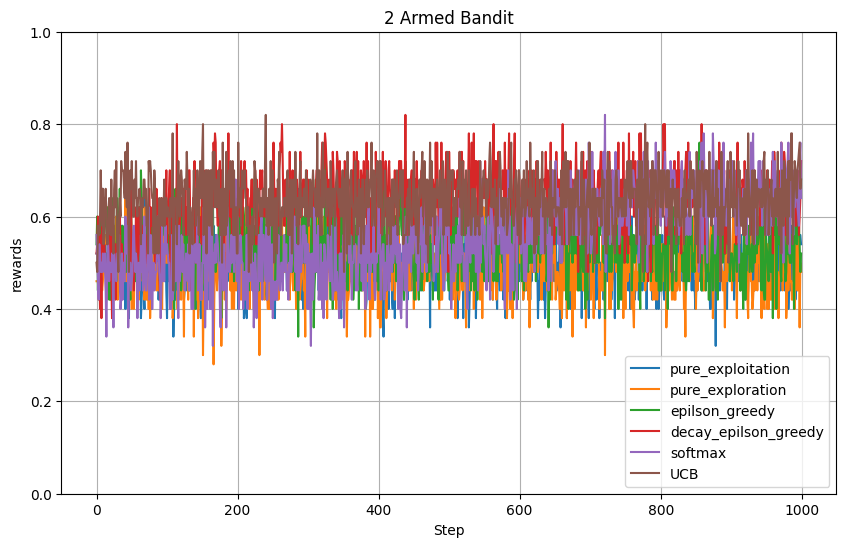

In [ ]:
#plotting 4
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, reward_1,label="pure_exploitation")
plt.plot(time_steps, reward_2,label="pure_exploration")
plt.plot(time_steps, reward_3,label="epilson_greedy")
plt.plot(time_steps, reward_4,label="decay_epilson_greedy")
plt.plot(time_steps, reward_5,label="softmax")
plt.plot(time_steps, reward_6,label="UCB")

plt.title('2 Armed Bandit')
plt.xlabel('Step')
plt.ylabel('rewards')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)
plt.show()


In [ ]:
env2 = make('BanditWalk-2', render_mode="rgb_array")

In [ ]:
#5
#multi armed agents
reward_1=np.zeros(1000)
reward_2=np.zeros(1000)
reward_3=np.zeros(1000)
reward_4=np.zeros(1000)
reward_5=np.zeros(1000)
reward_6=np.zeros(1000)

_,reward_1,_=pure_exploitation(env2,seed=42,maxepisodes=1000)

_,reward_2,_=pure_exploration(env2,seed=42,maxepisodes=1000)

_,reward_3,_=epsilon_greedy(env2,seed=42,maxepisodes=1000,E=0.7)

epsilon=decayAlpha(1, 0.0001, 1000, decayType="exponential")
_,reward_4,_=decay_epsilon_greedy(env2,seed=42,maxepisodes=1000,Epsilon=epsilon)


T=epsilon=decayAlpha(100, 0.01, 1000, decayType="exponential")
_,reward_5,_=softmax(env2,seed=42,maxepisodes=1000,T=T)


_,reward_6,_=UCB(env2,seed=42,maxepisodes=1000,c=0.5)




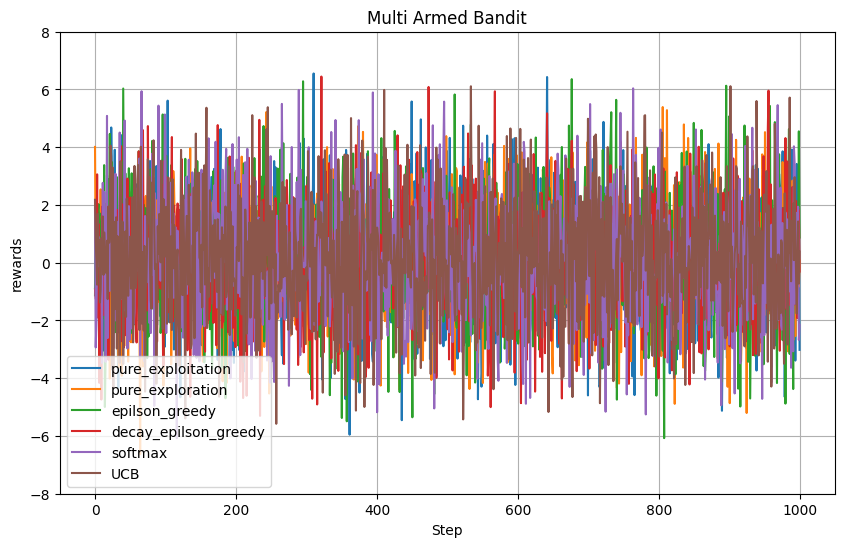

In [ ]:
#plotting 5
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, reward_1,label="pure_exploitation")
plt.plot(time_steps, reward_2,label="pure_exploration")
plt.plot(time_steps, reward_3,label="epilson_greedy")
plt.plot(time_steps, reward_4,label="decay_epilson_greedy")
plt.plot(time_steps, reward_5,label="softmax")
plt.plot(time_steps, reward_6,label="UCB")

plt.title('Multi Armed Bandit')
plt.xlabel('Step')
plt.ylabel('rewards')
plt.grid(True)
plt.legend()
plt.ylim(-8, 8)
plt.show()

In [ ]:
#6
#regret 2-armed bandit
regret_1 = np.zeros(1000)
regret_2 = np.zeros(1000)
regret_3 = np.zeros(1000)
regret_4 = np.zeros(1000)
regret_5 = np.zeros(1000)
regret_6 = np.zeros(1000)
regret = np.zeros(1000)

for i in range(50):
    action, _, q_est = pure_exploitation(env[i],seed=40,maxepisodes=1000)
    regret = Regret(q_est, action)
    regret_1 = regret_1 + regret
regret_1 = regret_1 / 50

for i in range(50):
    action, _, q_est = pure_exploration(env[i],seed=40,maxepisodes=1000)
    regret = Regret(q_est, action)
    regret_2 = regret_2 + regret
regret_2 = regret_2 / 50

for i in range(50):
    action, _, q_est = epsilon_greedy(env[i],seed=40,maxepisodes=1000, E=0.7)
    regret = Regret(q_est, action)
    regret_3 = regret_3 + regret
regret_3 = regret_3 / 50

epsilon = decayAlpha(1, 0.0001, 1000, decayType="exponential")
for i in range(50):
    action, _, q_est = decay_epsilon_greedy(env[i],seed=40,maxepisodes=1000, Epsilon=epsilon)
    regret = Regret(q_est, action)
    regret_4 = regret_4 + regret
regret_4 = regret_4 / 50

T = decayAlpha(100, 0.01, 1000, decayType="exponential")
for i in range(50):
    action, _, q_est = softmax(env[i],seed=40,maxepisodes=1000, T=T)
    regret = Regret(q_est, action)
    regret_5 = regret_5 + regret
regret_5 = regret_5 / 50

for i in range(50):
    action, _, q_est = UCB(env[i],seed=40,maxepisodes=1000, c=0.5)
    regret = Regret(q_est, action)
    regret_6 = regret_6 + regret
regret_6 = regret_6 / 50


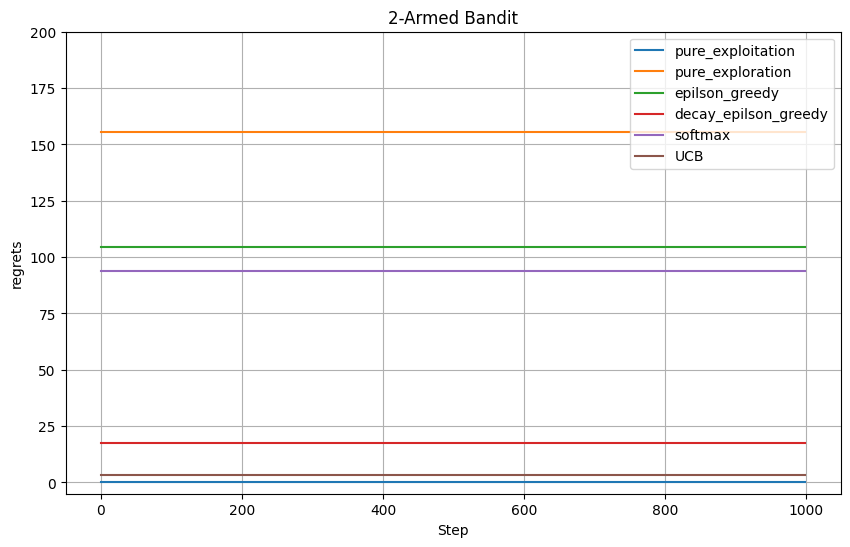

In [ ]:
#plotting 6
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, regret_1,label="pure_exploitation")
plt.plot(time_steps, regret_2,label="pure_exploration")
plt.plot(time_steps, regret_3,label="epilson_greedy")
plt.plot(time_steps, regret_4,label="decay_epilson_greedy")
plt.plot(time_steps, regret_5,label="softmax")
plt.plot(time_steps, regret_6,label="UCB")

plt.title('2-Armed Bandit')
plt.xlabel('Step')
plt.ylabel('regrets')
plt.grid(True)
plt.legend()
plt.ylim(-5,200)
plt.show()

In [ ]:
#7
# regret for multi armed agents
regret_1=np.zeros(1000)
regret_2=np.zeros(1000)
regret_3=np.zeros(1000)
regret_4=np.zeros(1000)
regret_5=np.zeros(1000)
regret_6=np.zeros(1000)
regret=np.zeros(1000)

action,_,q_est=pure_exploitation(env2,seed=40,maxepisodes=1000)
regret_1=Regret(q_est, action)

action,_,q_est=pure_exploration(env2,seed=40,maxepisodes=1000)
regret_2=Regret(q_est, action)

action,_,q_est=epsilon_greedy(env2,seed=40,maxepisodes=1000,E=0.7)
regret_3=Regret(q_est, action)

epsilon=decayAlpha(1, 0.0001, 1000, decayType="exponential")
action,_,q_est=decay_epsilon_greedy(env2,seed=40,maxepisodes=1000,Epsilon=epsilon)
regret_4=Regret(q_est, action)


T=epsilon=decayAlpha(100, 0.01, 1000, decayType="exponential")
action,_,q_est=softmax(env2,seed=40,maxepisodes=1000,T=T)
regret_5=Regret(q_est, action)


action,_,q_est=UCB(env2,seed=40,maxepisodes=1000,c=0.5)
regret_6=Regret(q_est, action)

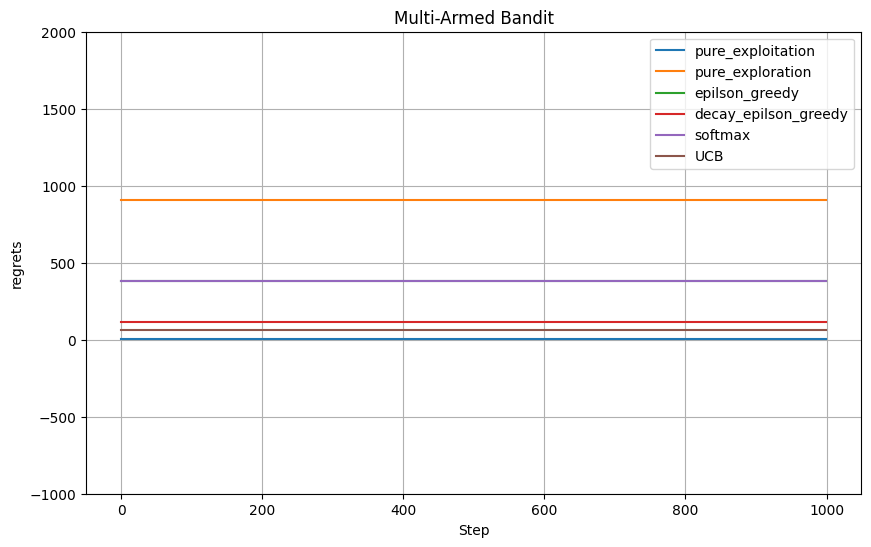

In [ ]:
#plotting 7
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
plt.plot(time_steps, np.full(1000,regret_1),label="pure_exploitation")
plt.plot(time_steps, np.full(1000,regret_2),label="pure_exploration")
plt.plot(time_steps, np.full(1000,regret_3),label="epilson_greedy")
plt.plot(time_steps, np.full(1000,regret_4),label="decay_epilson_greedy")
plt.plot(time_steps, np.full(1000,regret_5),label="softmax")
plt.plot(time_steps, np.full(1000,regret_6),label="UCB")

plt.title('Multi-Armed Bandit')
plt.xlabel('Step')
plt.ylabel('regrets')
plt.grid(True)
plt.legend()
plt.ylim(-1000,2000)
plt.show()

2-MONTE CARLO ESTIMATION AND TD LEARNING

In [ ]:
#env3
class RandomWalkEnv(Env):
    metadata = {"render_modes": ["human", "rgb_array"], "render_fps": 4}

    def __init__(self, render_mode=None):
        self.P = {
            0: {
                0: [(1.0, 0, 0.0, True)],
                1: [(1.0, 0, 0.0, True)]
            },
            1: {
                0: [(0.5, 0, 0.0, True), (0.5, 2, 0.0, False)],
                1: [(0.5, 2, 0.0, False), (0.5, 0, 0.0, True)]
            },
            2: {
                0: [(0.5, 1, 0.0, False), (0.5, 3, 0.0, False)],
                1: [(0.5, 3, 0.0, False), (0.5, 1, 0.0, False)]
            },
            3: {
                0: [(0.5, 2, 0.0, False), (0.5, 4, 0.0, False)],
                1: [(0.5, 4, 0.0, False), (0.5, 2, 0.0, False)]
            },
            4: {
                0: [(0.5, 3, 0.0, False), (0.5, 5, 0.0, False)],
                1: [(0.5, 5, 0.0, False), (0.5, 3, 0.0, False)]
            },
            5: {
                0: [(0.5, 4, 0.0, False), (0.5, 6, 1.0, True)],
                1: [(0.5, 6, 1.0, True), (0.5, 4, 0.0, False)]
            },
            6: {
                0: [(1.0, 6, 0.0, True)],
                1: [(1.0, 6, 0.0, True)]
            }
        }
        self.size = 7 # The size of the 1D grid

        # We have 3 observations, corresponding to each position in the 1-D grid
        self.observation_space = spaces.Discrete(self.size)

        # We have 2 actions, corresponding to "left" & "right"
        self.action_space = spaces.Discrete(2)

        assert render_mode is None or render_mode in self.metadata["render_modes"]
        self.render_mode = render_mode

        self.window = None
        self.clock = None

    def _get_obs(self):
      #current_location,target_location
      return [self._agent_location, self._target_location]


    def _get_info(self):
        return {
            "distance": abs(self._agent_location - self._target_location)
        }

    def reset(self,seed=None, options=None):
        super().reset(seed=seed)
        self._agent_location = 3
        self._target_location = self.size-1
        self._dead_state = 0


        observation = self._get_obs()
        info = self._get_info()

        if self.render_mode == "human":
            self._render_frame()

        return observation, info


    def step(self, action):

        prev_location = self._agent_location
        transitions = self.P[prev_location][action]
        probabilities, next_states, rewards, terminals = zip(*transitions)

        # Randomly select a transition based on the probabilities
        index = random.choices(range(len(probabilities)), weights=probabilities, k=1)[0]
        self._agent_location, reward, terminated = next_states[index], rewards[index], terminals[index]
        observation = self._get_obs()
        info = self._get_info()

        truncated = False

          # "current_state": prev_location,"action":action,"next_state": self._agent_location,"reward":reward,"done":terminated
        tansition_info={"current_state": prev_location,
                        "action":action,
                          "next_state": self._agent_location,
                          "reward":reward,
                          "done":terminated}

        if self.render_mode == "human":
            self._render_frame()

        # Return the required 5-tuple
        return observation, reward, terminated,truncated,tansition_info

register(id='BanditWalk-3', entry_point=RandomWalkEnv)



In [ ]:
env3=make('BanditWalk-3', render_mode="rgb_array")

In [ ]:
#1
def generateTrajectory(env, seed,pi, maxSteps):
  e=0
  trajectory = []
  observation= env.reset(seed=seed)
  for e in range(maxSteps):
    action=pi
    observation, reward, terminated,truncated,info = env.step(action)
    t = (info['current_state'], info['action'], info['next_state'], info['reward'], info['done'])
    trajectory.append(t)
    if terminated:
      break
    elif e==maxSteps-1 :
      trajectory=[]
  return trajectory


In [ ]:
#1 implementation
#policy (only left)=0
trajectory=generateTrajectory(env3,seed=39, pi=0, maxSteps=10)
print(trajectory)

[(3, 0, 2, 0.0, False), (2, 0, 1, 0.0, False), (1, 0, 0, 0.0, True)]


/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `reset()` method should be an int or np.int64, actual type: <class 'list'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `reset()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:127: UserWarning: WARN: The obs returned by the `step()` method should be an int or np.int64, actual type: <class 'list'>
  logger.warn(f"{pre} should be an int or np.int64, actual type: {type(obs)}")
/usr/local/lib/python3.10/dist-packages/gymnasium/utils/passive_env_checker.py:159: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{

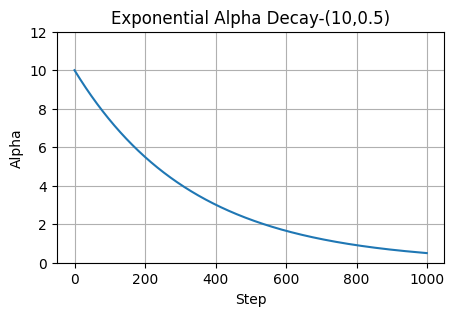

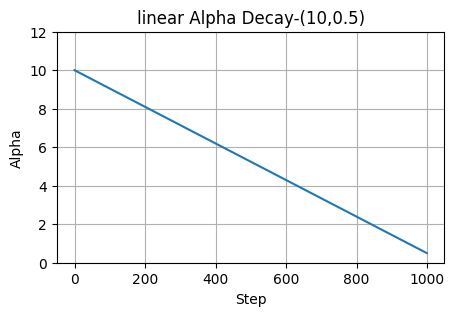

In [ ]:
#2
time_steps = np.arange(1000)
#exponential
alpha=decayAlpha(10, 0.5, 1000, decayType="exponential")
plt.figure(figsize=(5, 3))
plt.plot(time_steps, alpha)

plt.title('Exponential Alpha Decay-(10,0.5)')
plt.xlabel('Step')
plt.ylabel('Alpha')
plt.grid(True)

plt.ylim(0, 12)
plt.show()

#linear
alpha=decayAlpha(10, 0.5, 1000, decayType="linear")
plt.figure(figsize=(5, 3))
plt.plot(time_steps, alpha)

plt.title('linear Alpha Decay-(10,0.5)')
plt.xlabel('Step')
plt.ylabel('Alpha')
plt.grid(True)

plt.ylim(0, 12)
plt.show()

In [ ]:
#3 #4
#monte carlo estimation
def monteCarlo(env,seed,pi,gamma,initialValue, finalValue, maxSteps, decayType,numEps,FV):
    v=np.zeros(env.observation_space.n)
    v_r=np.zeros((numEps,env.observation_space.n))
    alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
    j=0
    G=0
    G_r=np.zeros((numEps,env.observation_space.n))
    for e in range(numEps):
        G=0
        alp=alpha[e]
        t= generateTrajectory(env,seed, pi, maxSteps)
        visited=np.full(env.observation_space.n, False, dtype=bool)
        for i in range(len(t)):
            s,a,s_n,r,d=t[i]
            if visited[s] and FV:
                continue
            else:
                visited[s]=True
            j=i
            while j<len(t):
                g=(gamma**(j-i))*(t[j][3])
                G=G+g
                j=j+1
            v[s]=v[s]+alp*(G-v[s])
            G_r[e,s]=G
        v_r[e]=v
    return v_r ,G_r

#TD learning
def TemporalDifference(env,seed,pi,gamma,initialValue, finalValue,decayType, numEps):
    v=np.zeros(env.observation_space.n)
    v_r=np.zeros((numEps,env.observation_space.n))
    alpha=decayAlpha(initialValue, finalValue, numEps, decayType)
    G_r=np.zeros((numEps,env.observation_space.n))

    for e in range(numEps):
        alp=alpha[e]
        observation,distance= env.reset(seed=seed)
        s=observation[0]
        done=False
        while not done:
            a=pi
            obs,r,done,trunc,info=env.step(a)
            s_n=obs[0]
            td_target=r
            if not done:
                td_target=td_target+gamma*v[s_n]
            td_error=td_target-v[s]
            v[s]=v[s]+alp*td_error
            s=s_n
            G_r[e,s]=td_target
        v_r[e]=v
    return v_r,G_r



In [ ]:
#3 implementation

v_mc,_=monteCarlo(env3,seed=39,pi=0,gamma=0.8,initialValue=0.5, finalValue=0.02, maxSteps=15, decayType="exponential",numEps=10,FV=True)
v_mc

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.12183385, 0.27412617,
        0.46449156, 0.        ],
       [0.        , 0.        , 0.        , 0.1615378 , 0.36346005,
        0.61586287, 0.        ],
       [0.        , 0.        , 0.        , 0.20938402, 0.47111405,
        0.79827658, 0.        ],
       [0.        , 0.        , 0.        , 0.20938402, 0.47111405,
        0.79827658, 0.        ],
       [0.        , 0.        , 0.        , 0.23200452, 0.52201017,
        0.88451722, 0.        ],
       [0.        , 0.        , 0.        , 0.22317139, 0.50213563,
        0.88451722, 0.        ],
       [0.        , 0.        , 0.        , 0.21870796, 0.49209292,
        0.88451722, 0. 

In [ ]:
#4 implementation
v_td,_=TemporalDifference(env3,seed=39,pi=0,gamma=0.8,initialValue=0.5, finalValue=0.02,decayType="exponential", numEps=10)
v_td

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.5       , 0.        ],
       [0.        , 0.        , 0.        , 0.01542092, 0.13878013,
        0.47627302, 0.        ],
       [0.        , 0.        , 0.        , 0.02861158, 0.19585816,
        0.50827189, 0.        ],
       [0.        , 0.        , 0.        , 0.04141907, 0.21693409,
        0.5574447 , 0.        ],
       [0.        , 0.0006653 , 0.00973827, 0.05983618, 0.19613804,
        0.50241034, 0.        ],
       [0.        , 0.00167091, 0.00966782, 0.05457193, 0.19613804,
        0.50241034, 0.        ],
       [0.        , 0.00160729, 0.00935063, 0.05278867, 0.19613804,
        0.50241034, 0.        ],
       [0.        , 0.00160729, 0.00935063, 0.05487111, 0.20025385,
        0.51236213, 0. 

In [ ]:
#5
#MC-FVMC
#exponential
a,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=True)
#linear
b,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="linear",numEps=1000,FV=True)


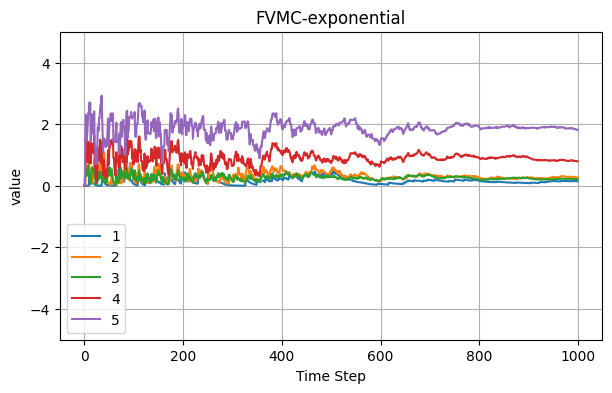

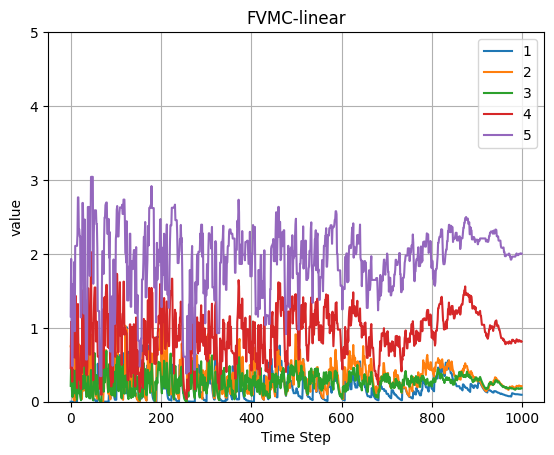

In [ ]:
#plot 5
time_steps = np.arange(1000)
plt.figure(figsize=(7, 4))
#exp
v=np.transpose(a)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('FVMC-exponential')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-5, 5)
plt.show()

#linear
v=np.transpose(b)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('FVMC-linear')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(0, 5)
plt.show()

In [ ]:
#6
#MC-EVMC
#exponential
a,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=False)
#linear
b,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="linear",numEps=1000,FV=False)


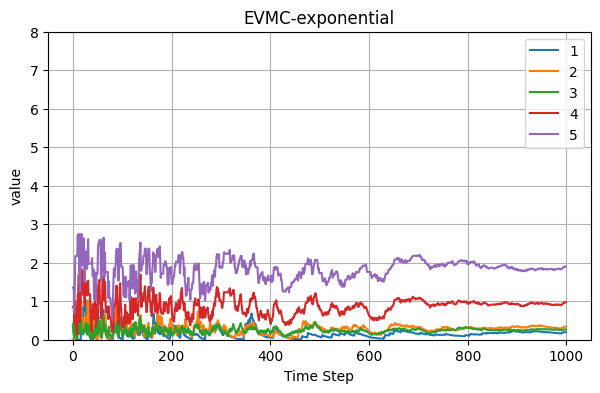

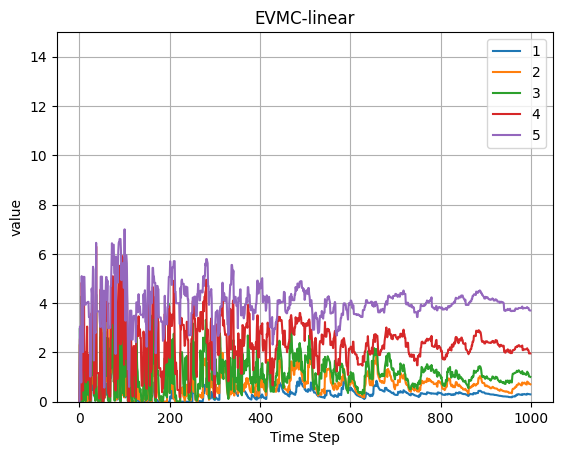

In [ ]:
#plot 6
time_steps = np.arange(1000)
plt.figure(figsize=(7, 4))
#exp
v=np.transpose(a)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('EVMC-exponential')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(0, 8)
plt.show()

#linear
v=np.transpose(b)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('EVMC-linear')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(0, 15)
plt.show()

In [ ]:
#7
#TD
#exp
c,_=TemporalDifference(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01,decayType="exponential", numEps=1000)
#linear
d,_=TemporalDifference(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01,decayType="linear", numEps=1000)


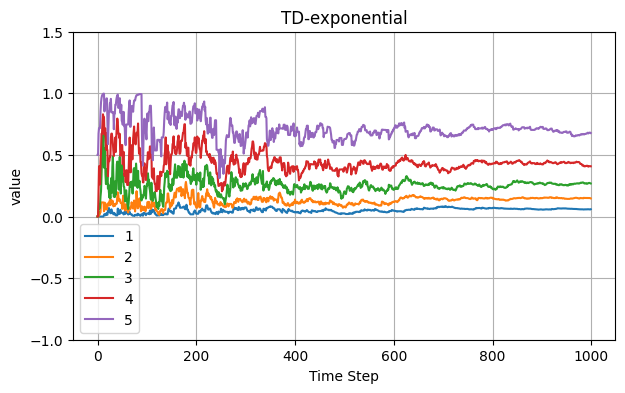

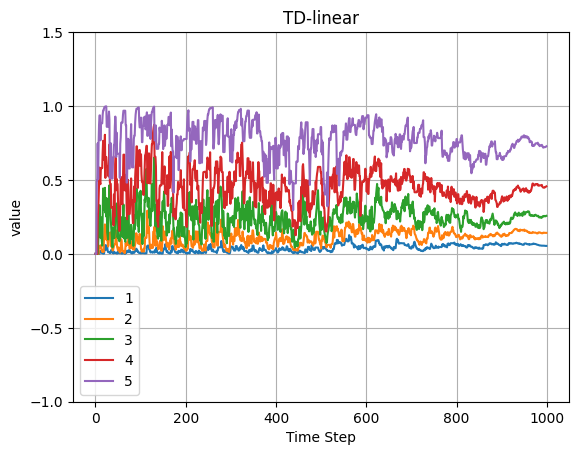

In [ ]:
#plot 7
time_steps = np.arange(1000)
plt.figure(figsize=(7, 4))
#exp
v=np.transpose(c)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('TD-exponential')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-1, 1.5)
plt.show()

#linear
v=np.transpose(d)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('TD-linear')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-1, 1.5)
plt.show()

In [ ]:
#8
Seed=[64,40 ,70 ,42 ,52]
k=np.zeros((1000,7))
l=np.zeros((1000,7))
m=np.zeros((1000,7))
for s in Seed:
  #fvmc
  v1,_=monteCarlo(env3,s,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=True)
  k=k+v1
  #evmc
  v2,_=monteCarlo(env3,s,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=False)
  l=l+v2
  #td
  v3,_=TemporalDifference(env3,s,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01,decayType="exponential", numEps=1000)
  m=m+v3
k=k/5
l=l/5
m=m/5


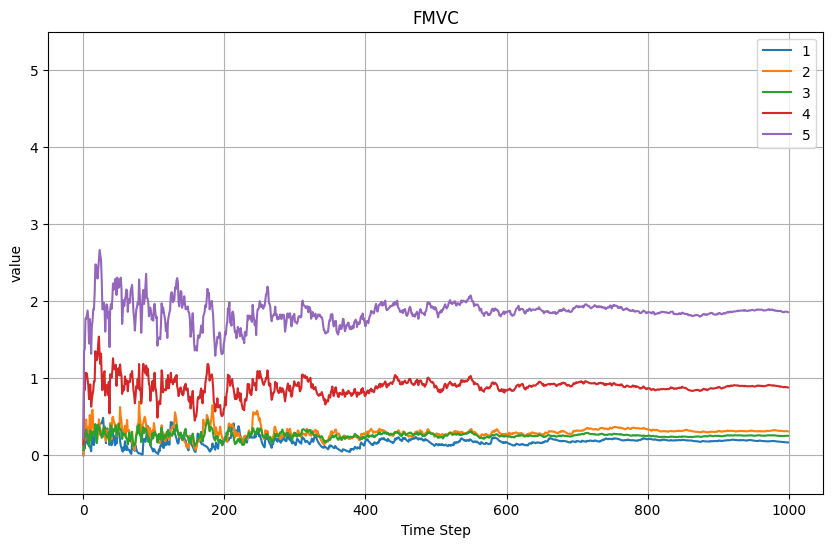

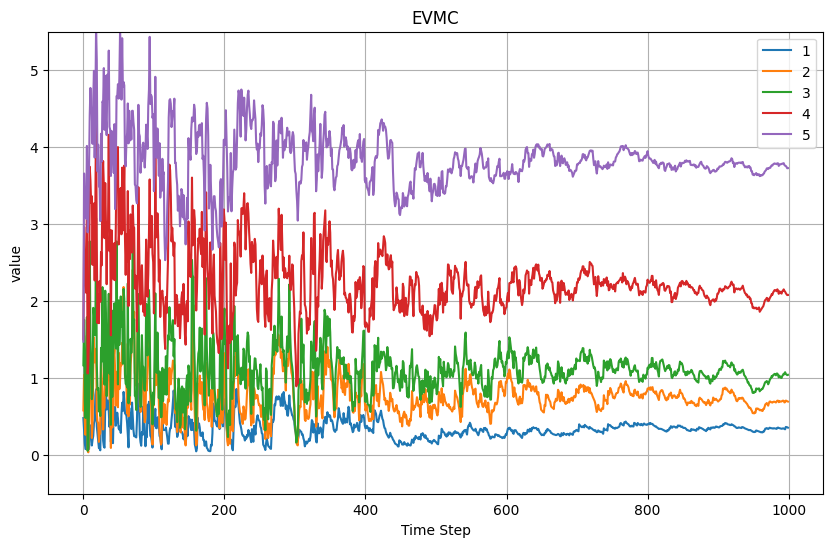

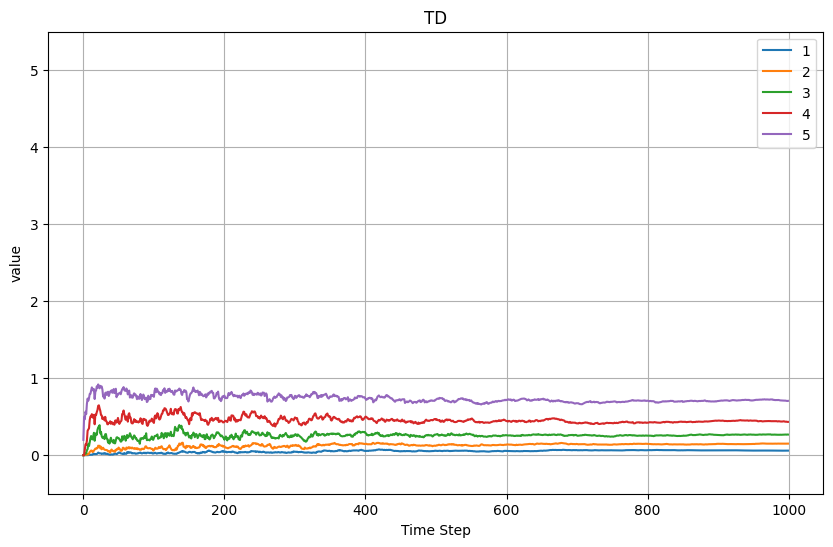

In [ ]:
#plot 8
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
#fvmc
v=np.transpose(k)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('FMVC')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-0.5, 5.5)
plt.show()
#evmc
v=np.transpose(l)
plt.figure(figsize=(10, 6))

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('EVMC')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-0.5, 5.5)
plt.show()

#td
v=np.transpose(m)
plt.figure(figsize=(10, 6))

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('TD')
plt.xlabel('Time Step')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-0.5, 5.5)
plt.show()

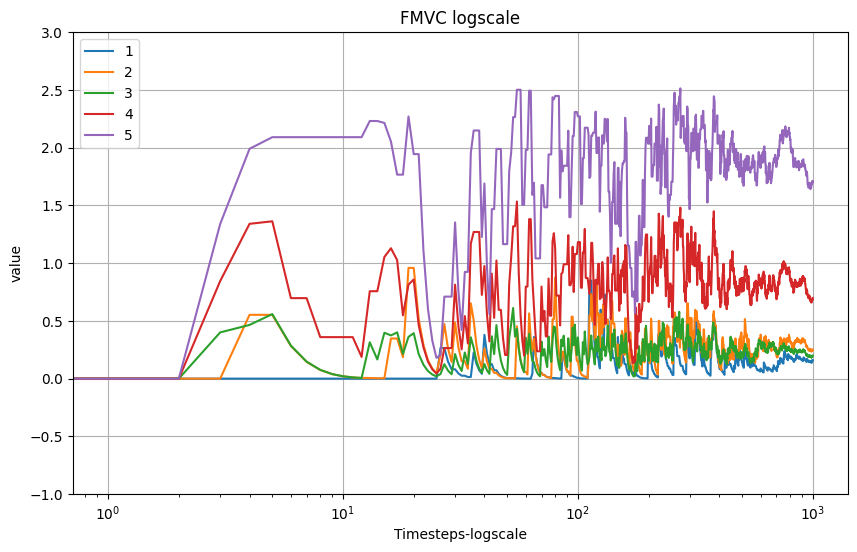

In [ ]:
#9
#FVMC
a,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=True)
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))
#exp
v=np.transpose(a)

plt.plot(time_steps, v[1],label=1)
plt.plot(time_steps, v[2],label=2)
plt.plot(time_steps, v[3],label=3)
plt.plot(time_steps, v[4],label=4)
plt.plot(time_steps, v[5],label=5)


plt.title('FMVC logscale')
plt.xlabel('Timesteps-logscale')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-1, 3)
plt.xscale('log')
plt.show()


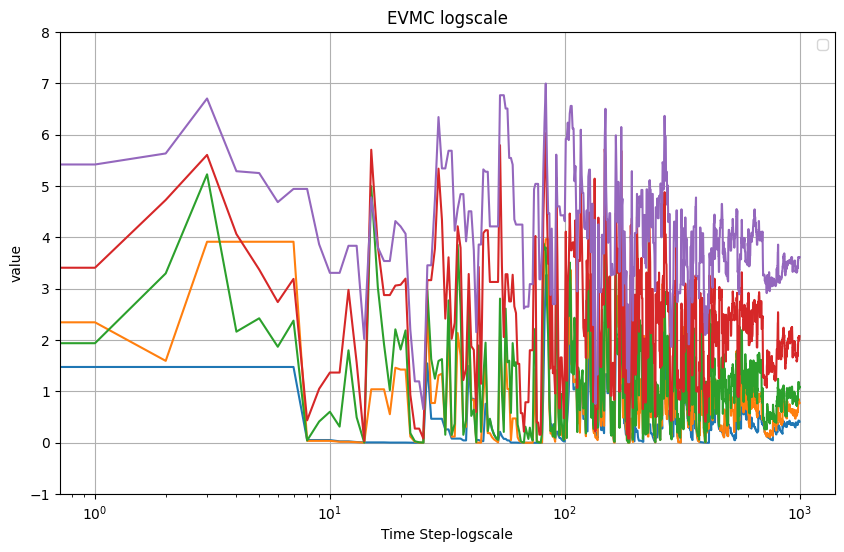

In [ ]:
#10
#EVMC
b,_=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=False)
time_steps = np.arange(1000)


plt.figure(figsize=(10, 6))

v=np.transpose(b)

plt.plot(time_steps, v[1])
plt.plot(time_steps, v[2])
plt.plot(time_steps, v[3])
plt.plot(time_steps, v[4])
plt.plot(time_steps, v[5])

plt.title('EVMC logscale')
plt.xlabel('Time Step-logscale')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-1, 8)
plt.xscale('log')
plt.show()


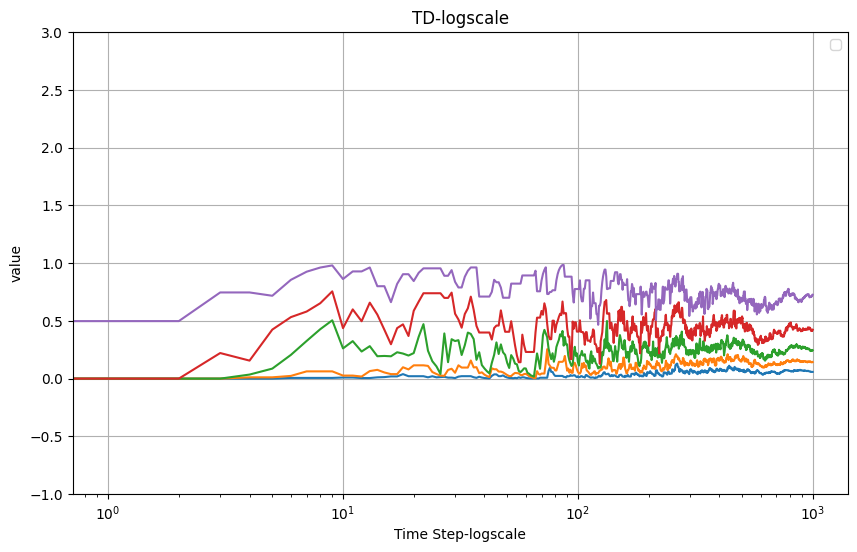

In [ ]:
#11
#td
c,_=TemporalDifference(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01,decayType="exponential", numEps=1000)
time_steps = np.arange(1000)


plt.figure(figsize=(10, 6))

v=np.transpose(c)

plt.plot(time_steps, v[1])
plt.plot(time_steps, v[2])
plt.plot(time_steps, v[3])
plt.plot(time_steps, v[4])
plt.plot(time_steps, v[5])

plt.title('TD-logscale')
plt.xlabel('Time Step-logscale')
plt.ylabel('value')
plt.legend()
plt.grid(True)

plt.ylim(-1, 3)
plt.xscale('log')
plt.show()

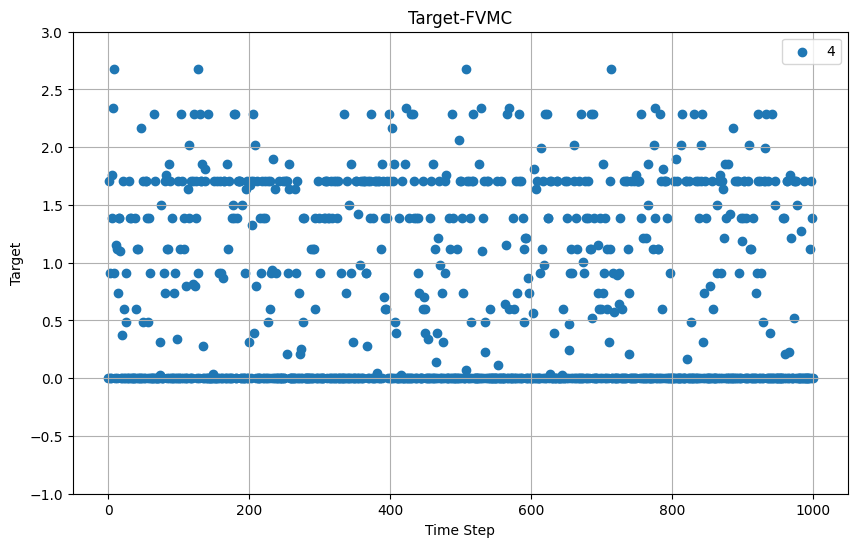

In [ ]:
#13
#non-terminal state=4
#FVMC
_,g=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=True)
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))

v=np.transpose(g)

plt.scatter(time_steps, v[4],label=4)

plt.title('Target-FVMC')
plt.xlabel('Time Step')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.ylim(-1, 3)

plt.show()

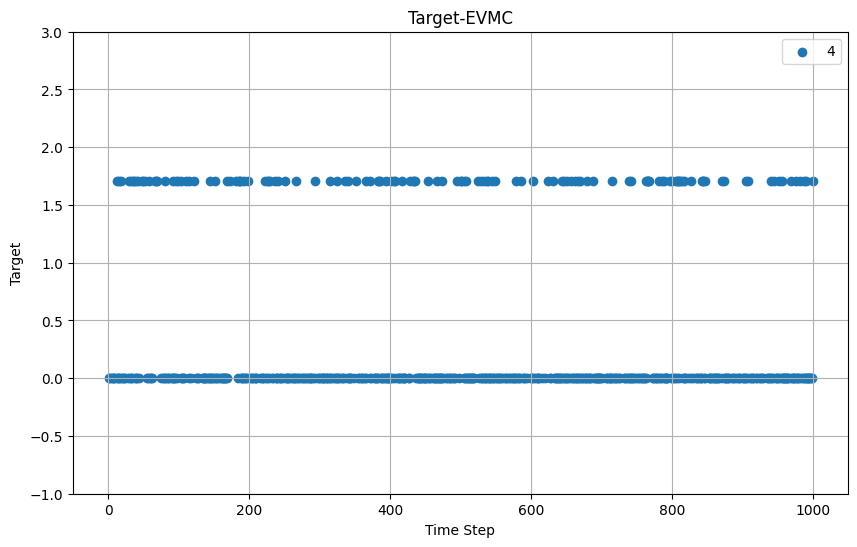

In [ ]:
#14
#non-terminal state=4
#EVMC
_,h=monteCarlo(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01, maxSteps=1000, decayType="exponential",numEps=1000,FV=False)
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))

v=np.transpose(h)

plt.scatter(time_steps, v[4],label=4)

plt.title('Target-EVMC')
plt.xlabel('Time Step')
plt.ylabel('Target')
plt.legend()
plt.grid(True)

plt.ylim(-1, 3)

plt.show()

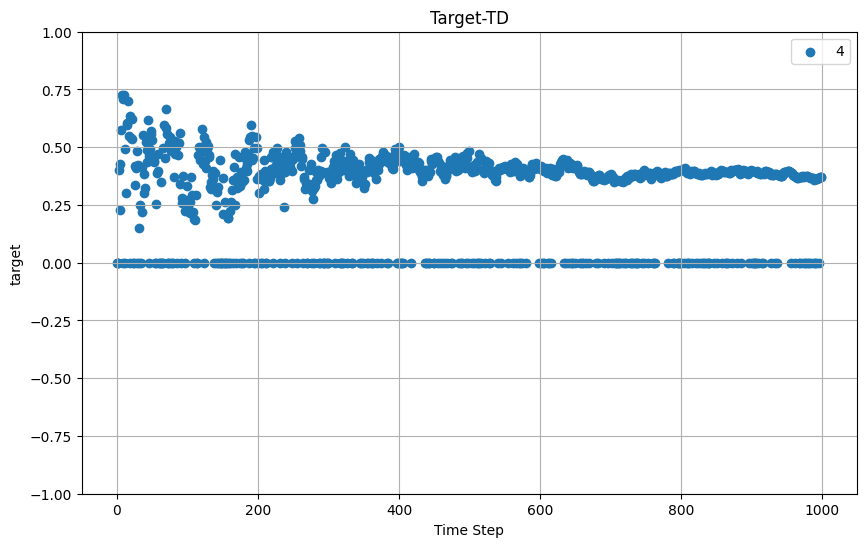

In [ ]:
#15
#non-terminal state=4
#EVMC
_,i=TemporalDifference(env3,seed=42,pi=0,gamma=0.9,initialValue=0.5, finalValue=0.01,decayType="exponential", numEps=1000)
time_steps = np.arange(1000)
plt.figure(figsize=(10, 6))

v=np.transpose(i)

plt.scatter(time_steps, v[4],label=4)

plt.title('Target-TD')
plt.xlabel('Time Step')
plt.ylabel('target')
plt.legend()
plt.grid(True)

plt.ylim(-1, 1)

plt.show()